# MDY7101 - EVALUACIÓN 3 

@Escriba acá su nombre

[Descripción de la data](https://archive.ics.uci.edu/ml/datasets/student+performance)

In [209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.rcParams["figure.figsize"] = (12,5)

# Carga de los datos

In [210]:
!wget https://www.dropbox.com/s/ld0s82vhit44cej/student-mat.csv

"wget" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [211]:
# data_frame = pd.read_csv("student-mat.csv")
# data_frame.info()

In [212]:
df_student = pd.read_csv('student-mat.csv')
df_student.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [213]:
print("El dataset presenta {0} observaciones considerando {1} variables".format(df_student.shape[0], df_student.shape[1]))

El dataset presenta 395 observaciones considerando 33 variables


In [214]:
df_student.columns = df_student.columns.str.lower()
df_student.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
       'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'dalc',
       'walc', 'health', 'absences', 'g1', 'g2', 'g3'],
      dtype='object')

+ El dataset no presenta valores nulos

# Gráficos para descubrir tendencias

Text(0, 0.5, 'Nota')

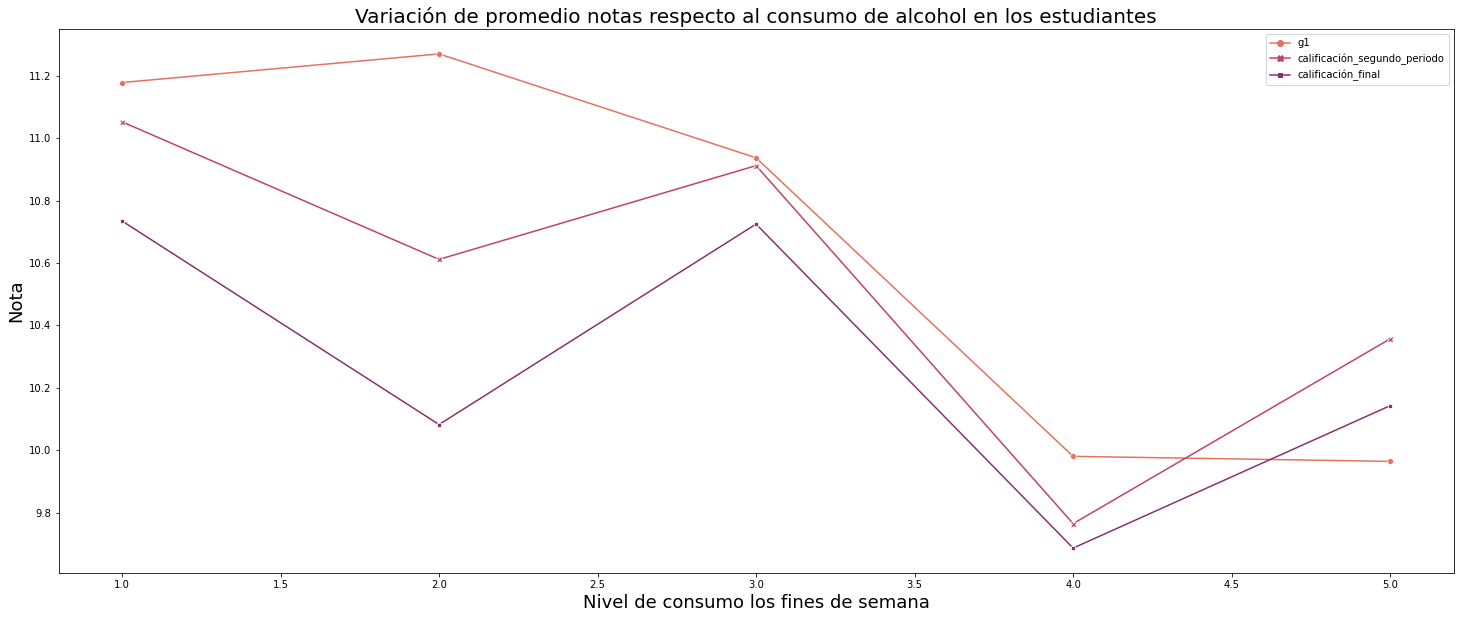

In [215]:
data = pd.DataFrame(df_student.groupby('walc')['g1'].mean())
a = data.assign(calificación_segundo_periodo = df_student.groupby('walc')['g2'].mean())
b = a.assign(calificación_final = df_student.groupby('walc')['g3'].mean())

f, ax = plt.subplots(1, 1, figsize=(25, 10))
ax = sns.lineplot(data=b,markers=True, dashes=False, palette="flare")
plt.title("Variación de promedio notas respecto al consumo de alcohol en los estudiantes", fontsize=20)
plt.xlabel("Nivel de consumo los fines de semana",fontsize=18)
plt.ylabel("Nota",fontsize=18)

+ Respecto al grafico, se puede concluir que los alumnos que consumen un nivel muy bajo de alcohol o no consumen, tienden a ser mejores respecto a las calificaciones
+ Respecto a los estudiantes que consumen alcohol, se ve una tendencia a la baj respecto a sus calificaciones finales

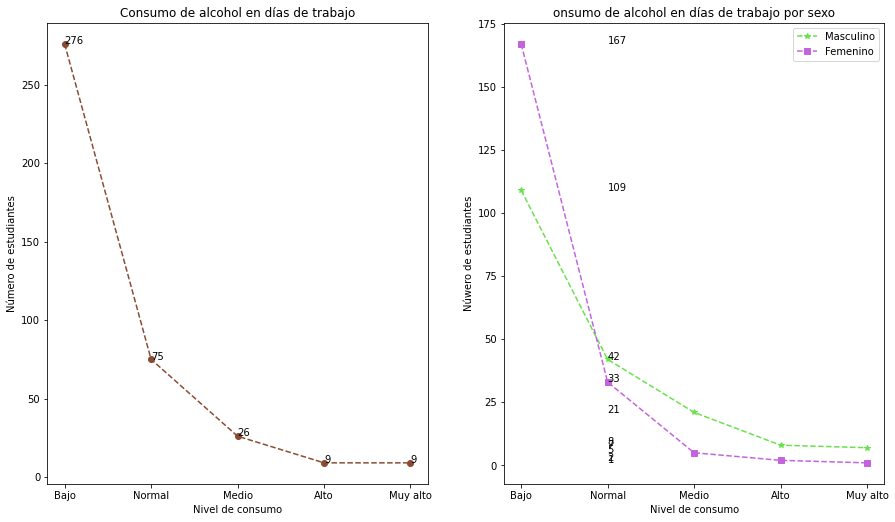

In [244]:
plt.figure(figsize=(15, 8)) 
x_values5 = ['Bajo', 'Normal', 'Medio', 'Alto', 'Muy alto']
y_values5 = df_student['dalc'].value_counts().tolist() 
ax = plt.subplot(1, 2, 1) 
plt.plot(x_values5, y_values5, color='#8a4b32', linestyle='--', marker='o')
plt.title('Consumo de alcohol en días de trabajo') 
ax.set_xlabel('Nivel de consumo')
ax.set_ylabel('Número de estudiantes')

for i, txt in enumerate(y_values5): 
    ax.annotate(txt, (x_values5[i], y_values5[i])) 

y_values6 = df_student[(df_student['sex'] == 'M')]['dalc'].value_counts().tolist() 
y_values7 = df_student[(df_student['sex'] == 'F')]['dalc'].value_counts().tolist()
ax = plt.subplot(1, 2, 2) 
plt.plot(x_values5, y_values6, color='#6ae04c', linestyle='--', marker='*') 
plt.plot(y_values7, color='#c364de', linestyle='--', marker='s')
plt.title('onsumo de alcohol en días de trabajo por sexo')
plt.legend(['Masculino', 'Femenino'], loc=1) 
ax.set_xlabel( 'Nivel de consumo')
ax.set_ylabel( 'Núwero de estudiantes')

for i, txt in enumerate(y_values6): 
    ax.annotate(txt, (x_values5[1], y_values6[i])) 
                
for i, txt in enumerate(y_values7): 
    ax.annotate(txt, (x_values5[1], y_values7[i])) 
    
plt.subplots_adjust(wspace=0.2, bottom=0.5, top=1.3) 
plt.show() 
plt.close('all')

##### 1
+ De acuerdo al grafico numero 1, se aprecia que la mayor cantidad de estudiantes tienen un consumo bajo o nulo de alcohol en los días de trabajo
+ Se aprecia cómo va bajando el nivel de consumo en los días de trabajo, esto se deduce que al estar con responsabilidades los estudiantes prefieren abtenerse del cosumo de alcohol
+ 18 estudiantes tienen un consumo de alcohol alto o muy alto

##### 2
+ De acuerdo al grafico numero 2, se aprecia que en el genero femenino hay más cantidad de estudiantes que consumen un nivel bajo o no consumen alcohol los días de trabajo
+ En el caso del consumo alto y muy alto de alcohol se aprecia que los hombres presentan la mayor cantidad de estudiantes (15)

# Gráficos para ver partes de un total

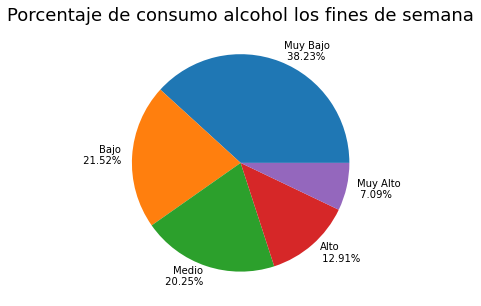

<Figure size 1440x720 with 0 Axes>

In [ ]:
clases = np.array([df_student[df_student.walc == 1].shape[0],
                   df_student[df_student.walc == 2].shape[0],
                   df_student[df_student.walc == 3].shape[0],
                   df_student[df_student.walc == 4].shape[0],
                   df_student[df_student.walc == 5].shape[0]])
labels = [ str(round(x * 1.0 / clases.sum() * 100.0, 2)) + '%' for x in clases]
labels[0] = 'Muy Bajo\n ' + labels[0]
labels[1] = 'Bajo\n ' + labels[1] 
labels[2] = 'Medio\n ' + labels[2]
labels[3] = 'Alto\n ' + labels[3] 
labels[4] = 'Muy Alto\n ' + labels[4]
plt.pie(clases, labels=labels)
plt.title('Porcentaje de consumo alcohol los fines de semana', fontsize=18) 
plt.show()
plt.gcf().set_size_inches(20, 10)

+ El 38.23% de los estudiantes tienen un consumo de alcohol muy bajo los fines de semana
+ El 7.09%% de los estudiantes tienen un consumo de alcohol muy alto los fines de semana
+ El 20.25% de los estudiantes tienen un consumo de alcohol medio los fines de semana

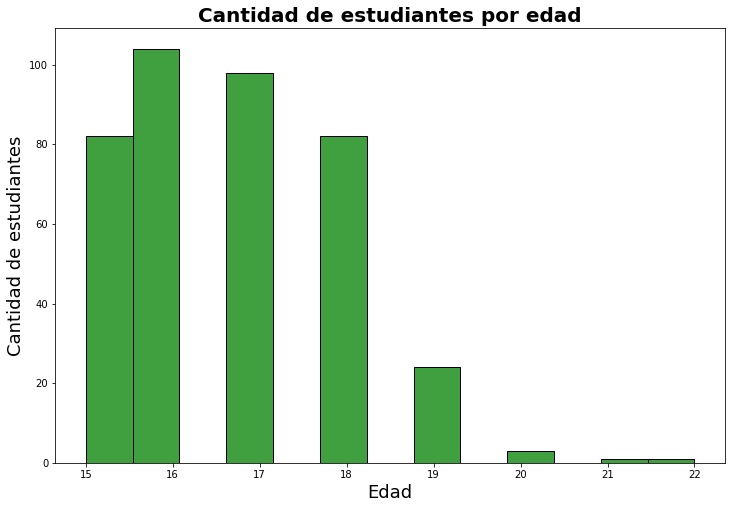

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.histplot(x="age", data=df_student, color = 'g')
plt.title('Cantidad de estudiantes por edad', fontsize = 20, fontweight="bold")
plt.xlabel("Edad", fontsize=18)
plt.ylabel("Cantidad de estudiantes", fontsize=18)
plt.show()

+ La mayoria de estudiantes tiene una edad entre 15 y 18 años
+ La menor cantidad de estudiantes se encuentra entre la edad de 20 y 22 años
+ La mayor cantidad de estudinates tiene 18 años

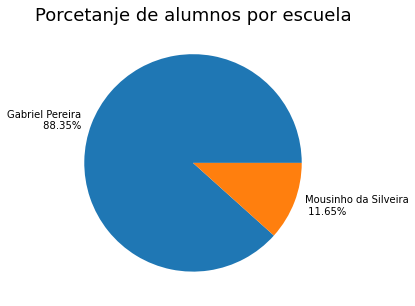

<Figure size 1440x720 with 0 Axes>

In [ ]:
clases = np.array([df_student[df_student.school == 'GP'].shape[0],
                   df_student[df_student.school == 'MS'].shape[0],])

labels = [ str(round(x * 1.0 / clases.sum() * 100.0, 2)) + '%' for x in clases]
labels[0] = 'Gabriel Pereira\n ' + labels[0]
labels[1] = 'Mousinho da Silveira\n ' + labels[1] 

plt.pie(clases, labels=labels)
plt.title('Porcetanje de alumnos por escuela', fontsize=18) 
plt.show()
plt.gcf().set_size_inches(20, 10)

+ En el grafico se puede observar que un 88.35% de los estudiantes asisten a la escuela Gabriel Pereira
+ Un 11.65% de los estudiantes asiste a la escuela Mousinho da Silva

# Gráficos para revisar distribuciones

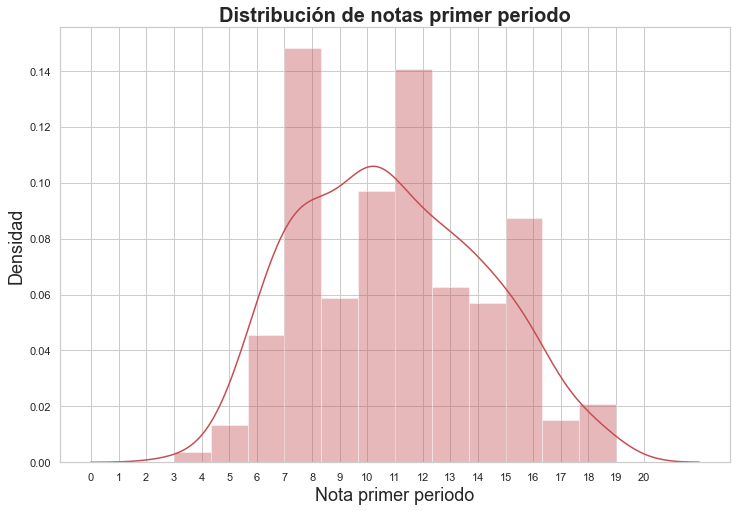

In [264]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.distplot(df_student['g1'], kde = True, color = 'r' )
plt.title('Distribución de notas primer periodo', fontsize = 20, fontweight="bold")
plt.xlabel("Nota primer periodo", fontsize=18)
plt.ylabel("Densidad", fontsize=18)
plt.xticks(range(0,21,1));
plt.show()

+ De acuerdo al grafico se puede observar que alrededor del 65% de los estudiante tiene una calificación en el primer periodo entre 7 y 14
+ Se observa que alrededor de un 96% de los estudiantes tiene una calificación en el primer periodo entre 4 y 17

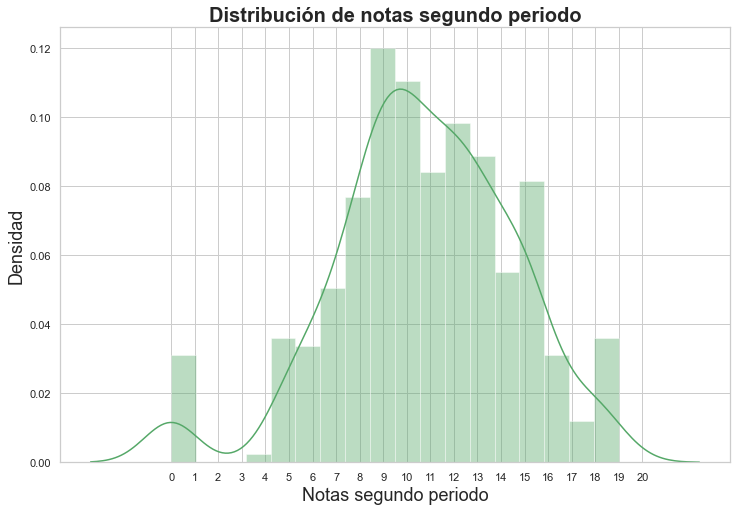

In [265]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.distplot(df_student['g2'], kde = True, color = 'g' )
plt.title('Distribución de notas segundo periodo', fontsize = 20, fontweight="bold")
plt.xlabel("Notas segundo periodo", fontsize=18)
plt.ylabel("Densidad", fontsize=18)
plt.xticks(range(0,21,1));
plt.show()

+ De acuerdo al grafico se puede observar que alrededor del 72% de los estudiante tiene una calificación en el primer periodo entre 6 y 14
+ Se observa que alrededor de un 95% de los estudiantes tiene una calificación en el primer periodo entre 3 y 18

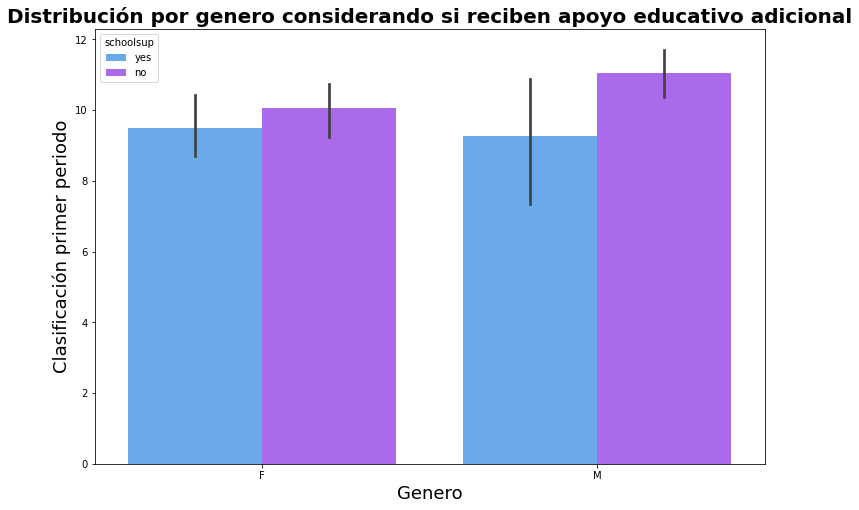

In [249]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='sex', y='g3', hue='schoolsup', data=df_student, palette='cool')
plt.title("Distribución por genero considerando si reciben apoyo educativo adicional", fontsize = 20, fontweight="bold")
plt.xlabel("Genero", fontsize=18)
plt.ylabel("Clasificación primer periodo", fontsize=18)
plt.show()

+ De acuerdo al grafico, se observa que las calificaciones más alta las posee el genero masculino que no recibe un apoyo educativo adicional
+ La calificación más baja la obtiene el genero femenino que si recibe apoyo educacional, se debuce que al recibir apoyo, estos son estudiantes que tal vez les cuesta más poder aprender con los metodos del colegio en donde asisten o les cuesta dicha materia
+ Se observa que el genero masculino y femenino que no reciben apoyo tienen las calificaciones más altas

# Gráficos para mostrar correlaciones

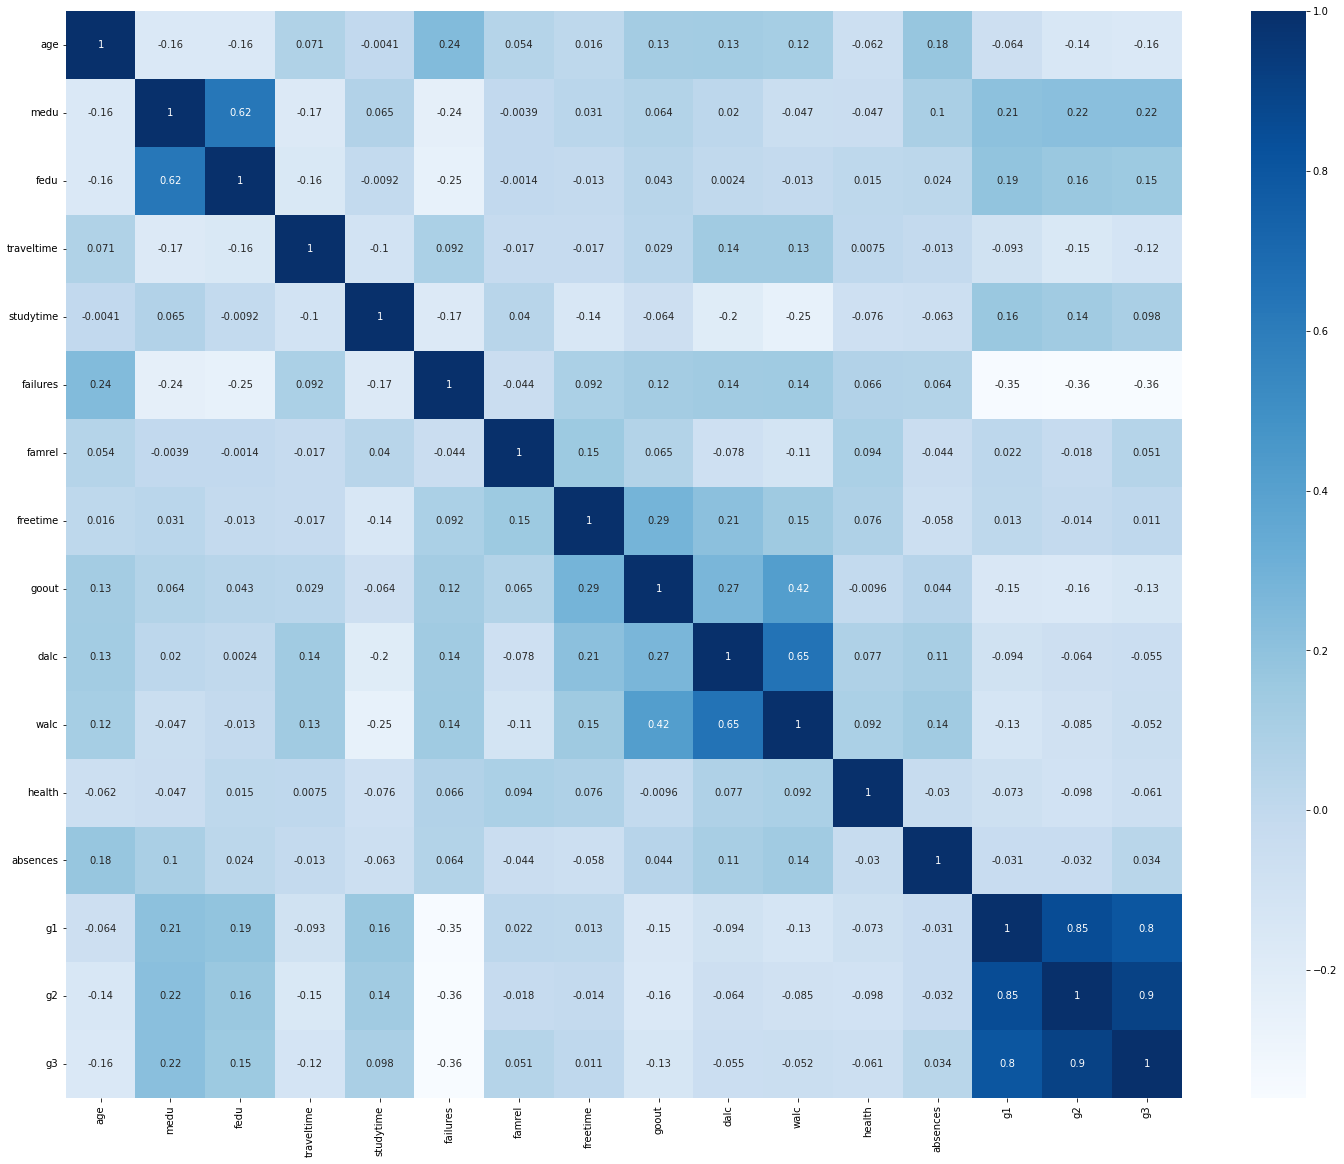

In [ ]:
f, h_map = plt.subplots(1, 1, figsize=(25, 20))
corr_mask = np.triu(df_student.corr())
h_map = sns.heatmap(df_student.corr(), annot=True, cmap='Blues')
plt.yticks(rotation=360)
plt.xticks(rotation=90)
plt.show()

+ Respecto a las notas finales se puede observar en el grafico que las variables con mayor correlación con G3 son absences, age, medu, fedu, failures, entonces, todas estas variables pueden afectar de forma positiva o negativa en la nota final del estudiante

#### Correlación con variables transformadas

In [ ]:
from sklearn.preprocessing import LabelEncoder

def Encoder(df):
          columnsToEncode = list(df.select_dtypes(include=['category','object']))
          le = LabelEncoder()
          for feature in columnsToEncode:
              try:
                  df[feature] = le.fit_transform(df[feature])
              except:
                  print('Error encoding '+feature)
          return df
      
Encoder(df_student)

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,...,famrel,freetime,goout,dalc,walc,health,absences,g1,g2,g3
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,1,1,0,2,2,3,3,...,5,5,4,4,5,4,11,9,9,9
391,1,1,17,1,1,1,3,1,3,3,...,2,4,5,3,4,2,3,14,16,16
392,1,1,21,0,0,1,1,1,2,2,...,5,5,3,3,3,3,3,10,8,7
393,1,1,18,0,1,1,3,2,3,2,...,4,4,1,3,4,5,0,11,12,10


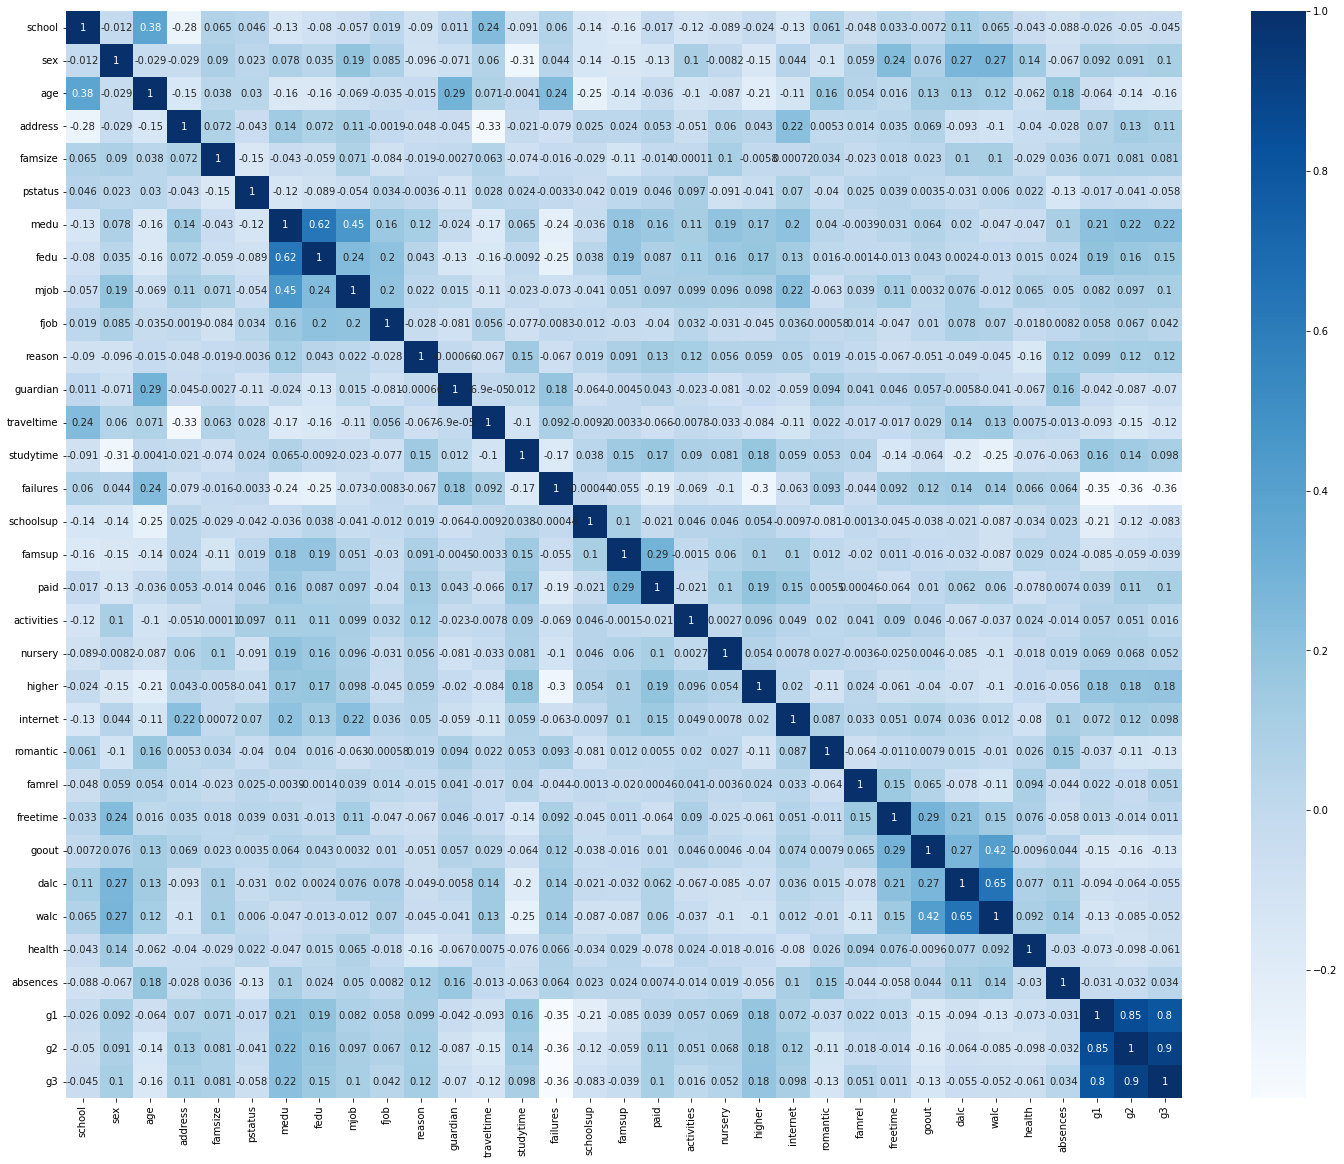

In [ ]:
f, h_map = plt.subplots(1, 1, figsize=(25, 20))
corr_mask = np.triu(Encoder(df_student).corr())
h_map = sns.heatmap(Encoder(df_student).corr(), annot=True, cmap='Blues')
plt.yticks(rotation=360)
plt.xticks(rotation=90)
plt.show()

+ Se puede observar que las variables cuantitativas trnasformadas con mayor correlación respecto a las notas finales (g3), son; sex, addres, mjob, reason, traveltime, paid, highher, goout, afectando de manera positiva o negativa en la nota final del estudiante
